## Testowanie/Prezentacja działania wybranych napisanych funkcji 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload 

import individual 
import utils 
import evolution
import population

reload(individual)
reload(population)
reload(evolution)
reload(utils)

from evolution import Evolution
from individual import Individual
from population import Population

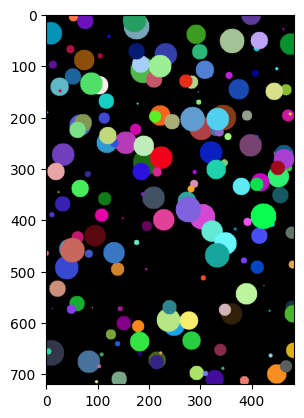

In [3]:
def test_convert_to_pixels_array():    
    indiv = Individual()
    indiv.generate_random_inidividual()
    indiv.show_image()

test_convert_to_pixels_array()

rozmiar obrazka to:  720 483
odlegosc od prawdziwej monalisy to  77673397


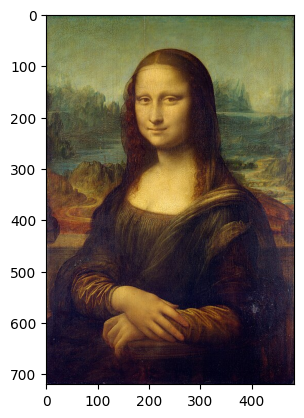

In [3]:
def test_objective_function():
    monalisa_utils = Utils('monalisa.jpg')
    plt.imshow(monalisa_utils.objective_picture)
    print("rozmiar obrazka to: ", monalisa_utils.length, monalisa_utils.width)

    random_picture = Individual()
    random_picture.generate_random_inidividual()

    objective_value = monalisa_utils.objective_function(random_picture)
    print("odlegosc od prawdziwej monalisy to ", objective_value)

test_objective_function()

wartości funkcji celu wszytskich osobników:  [76400064 75889259 74971629 76993888 77706683 78668876 77055699 77953916
 82082567 79769877]
pstwo wylosowania danego osobnika na rodzica:  [0.13113505 0.14292289 0.16409903 0.11743138 0.10098222 0.07877771
 0.11600497 0.09527683 0.         0.05336992]
chce wylosować:  5
wylosowani rodzice:  [2 1 6 2 7]
poczatkowa populacja sklada sie z:  10
jego pierwszy osobnik wyglada tak:
odleglosc do manalisy to:  76400064


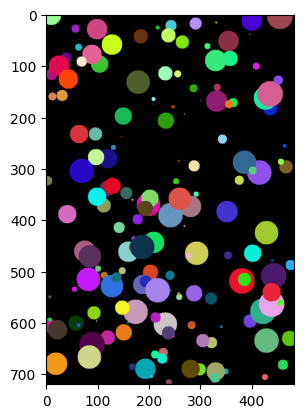

In [4]:
def test_evolution():
    mona_evolution = Evolution()
    initial_population = mona_evolution.evolve()
    return initial_population

P = test_evolution()
print("poczatkowa populacja sklada sie z: ", P.population_size)
print("jego pierwszy osobnik wyglada tak:")
P.population[0].show_image()
print("odleglosc do manalisy to: ", P.population[0].objective_value)


In [47]:
reload(utils)
from utils import Utils

def test_crossover():
    monalisa_utils = Utils('monalisa.jpg')
    print('pstwo mutacji to: ', monalisa_utils.mutation_probability)

    random_parents = monalisa_utils.create_initial_population(2)
    children = monalisa_utils.create_children_population(random_parents, np.array([0,1]))
    
    p1, p2 = random_parents.population[0], random_parents.population[1]
    child1, child2 = children.population[0], children.population[1] 
    return p1, p2, child1, child2 

x1, x2, c1, c2 = test_crossover()

pstwo mutacji to:  0.05


parent1: 


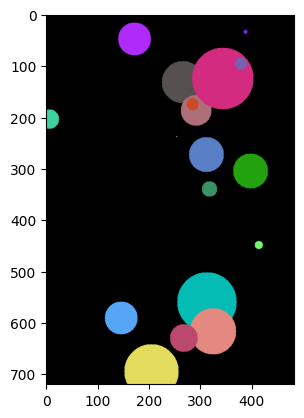

In [48]:
print('parent1: ')
x1.show_image()

parent2: 


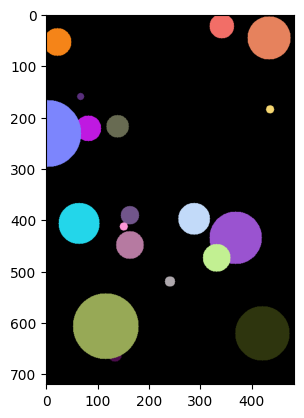

In [49]:
print('parent2: ')
x2.show_image()

child1: 


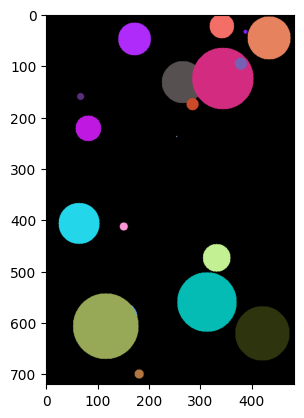

In [50]:
print('child1: ')
c1.show_image()

child2: 


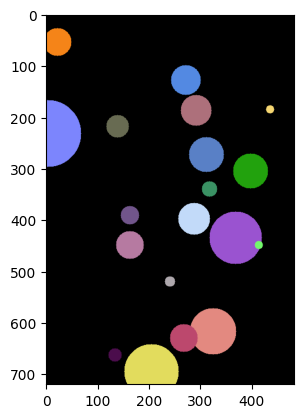

In [51]:
print('child2: ')
c2.show_image()